In [1]:
from sklearn.preprocessing import StandardScaler
from sail.models.torch.tcn import TCNRegressor
import numpy as np
import torch
from sklearn.datasets import make_regression

/Users/mehkj/miniconda3_i386/envs/imla/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def regression_data(n_samples, n_features):
    X, y = make_regression(n_samples, n_features, n_informative=10, bias=0, random_state=0)
    X, y = X.astype(np.float32), y.astype(np.float32).reshape(-1, 1)
    Xt = StandardScaler().fit_transform(X)
    yt = StandardScaler().fit_transform(y)
    return Xt, yt

In [12]:
n_samples = 100
n_features = 12
X, y = regression_data(n_samples, n_features)
X = X[:, :, np.newaxis]
learner_tcn = TCNRegressor(n_features, 1)
for _ in range(10):
    learner_tcn.partial_fit(X, y)
train_losses = learner_tcn.history[:, "train_loss"]

  epoch    train_loss     dur
-------  ------------  ------
      1        1.3099  0.0154
      2        1.0817  0.0140
      3        0.9499  0.0122
      4        0.7697  0.0122
      5        0.6616  0.0119
      6        0.5733  0.0118
      7        0.4957  0.0107
      8        0.4323  0.0112
      9        0.3600  0.0119
     10        0.2895  0.0120


In [13]:
y_prediction = learner_tcn.predict(X)

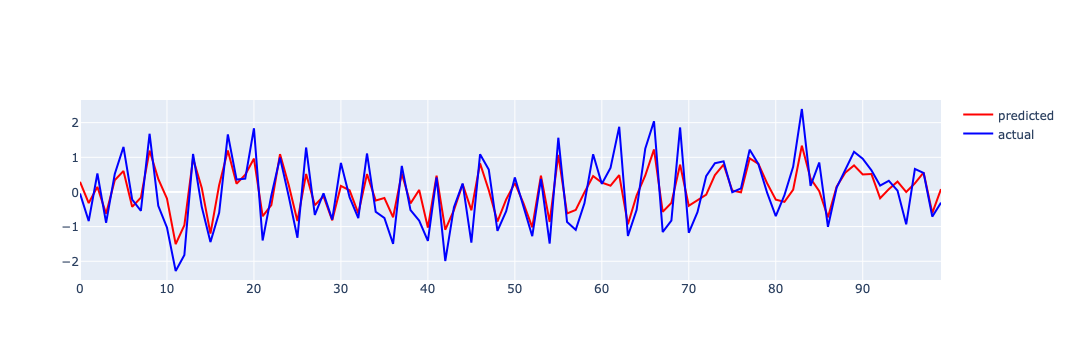

In [14]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'vscode'

y_pred = y_prediction.flatten().tolist()
y_true = y.flatten().tolist()
x = np.arange(len(y_true))
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y_pred, name='predicted',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=x, y=y_true, name='actual',
                         line=dict(color='blue', width=2)))
fig.show()